In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

# List of file paths
file_paths = ['TITAN.CSV', 'RELIANCE.CSV', 'ASIANPAINT.CSV', 'HEROMOTOCO.CSV', 'L&T.csv', 'TCS.CSV']

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and append its DataFrame to the list
for file_path in file_paths:
    df = pd.read_csv(file_path)
    # Assuming 'Date' is a column in your DataFrame
    df['Date'] = pd.to_datetime(df['Date'])
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
data = pd.concat(dfs, ignore_index=True)
# Assuming 'Date' is a column in your DataFrame
data['Date'] = pd.to_datetime(data['Date'])

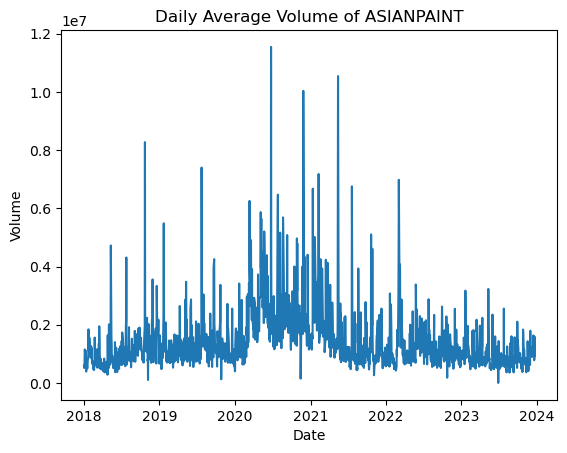

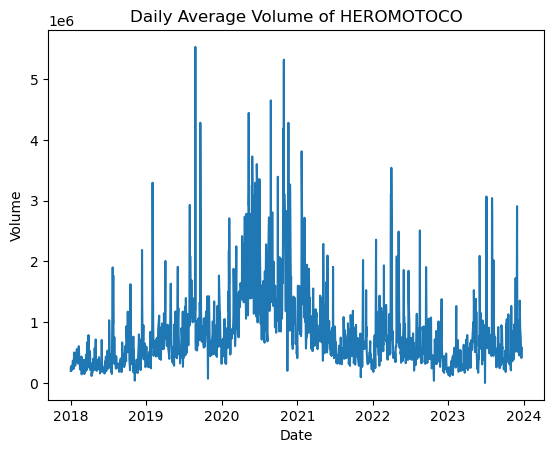

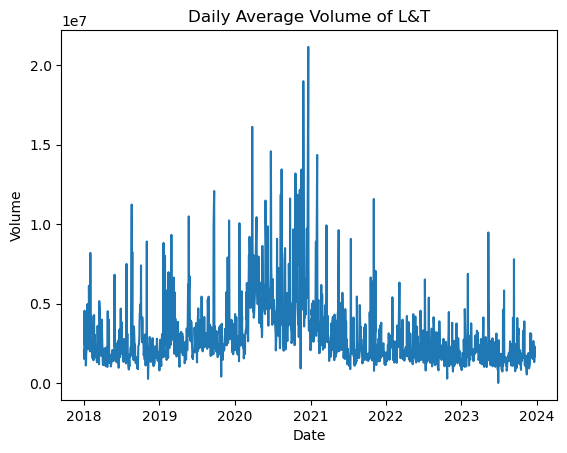

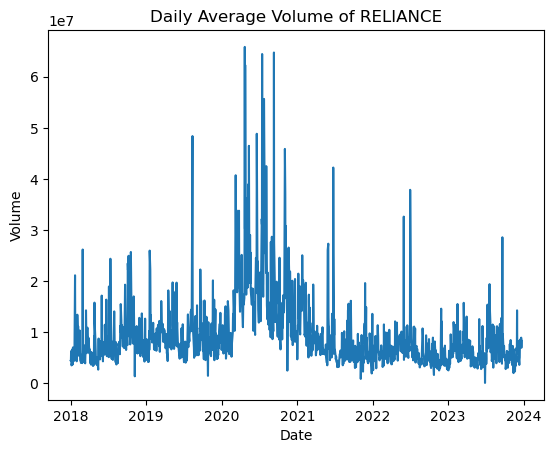

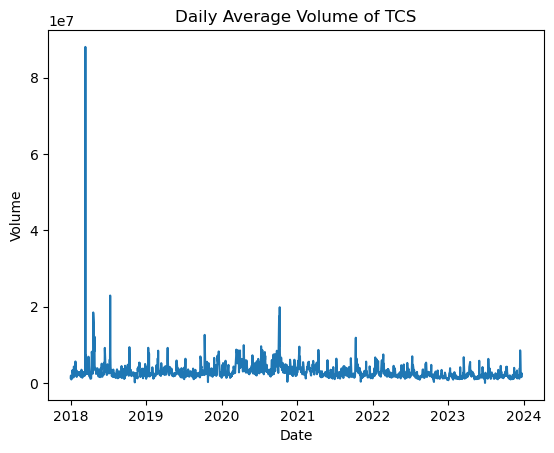

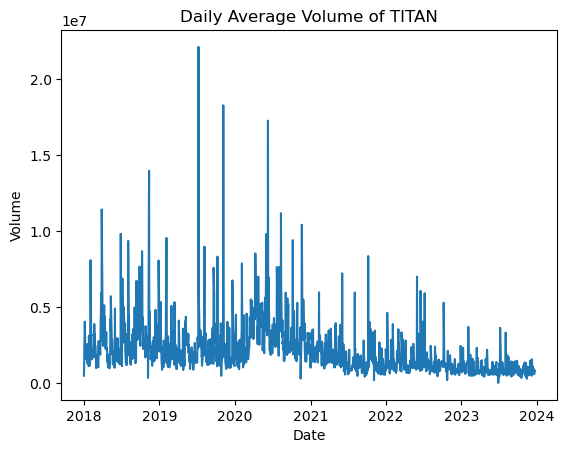

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools

# List of file paths and corresponding symbols
file_symbol_mapping = {'TITAN.CSV': 'TITAN', 'RELIANCE.CSV': 'RELIANCE', 'ASIANPAINT.CSV': 'ASIANPAINT',
                        'HEROMOTOCO.CSV': 'HEROMOTOCO', 'L&T.csv': 'L&T', 'TCS.CSV': 'TCS'}

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and append its DataFrame to the list
for file_path, symbol in file_symbol_mapping.items():
    df = pd.read_csv(file_path)
    df['Symbol'] = symbol  # Add a new column for the symbol
    df['Date'] = pd.to_datetime(df['Date'])
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Calculate daily average volume for each stock
daily_avg_volume = data.groupby(['Symbol', 'Date'])['Volume'].mean().reset_index()

# Plot separate charts for each stock
symbols = daily_avg_volume['Symbol'].unique()

for symbol in symbols:
    symbol_data = daily_avg_volume[daily_avg_volume['Symbol'] == symbol]
    plt.figure()  # Create a new figure for each stock
    plt.plot(symbol_data['Date'], symbol_data['Volume'])
    plt.title(f'Daily Average Volume of {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.show()


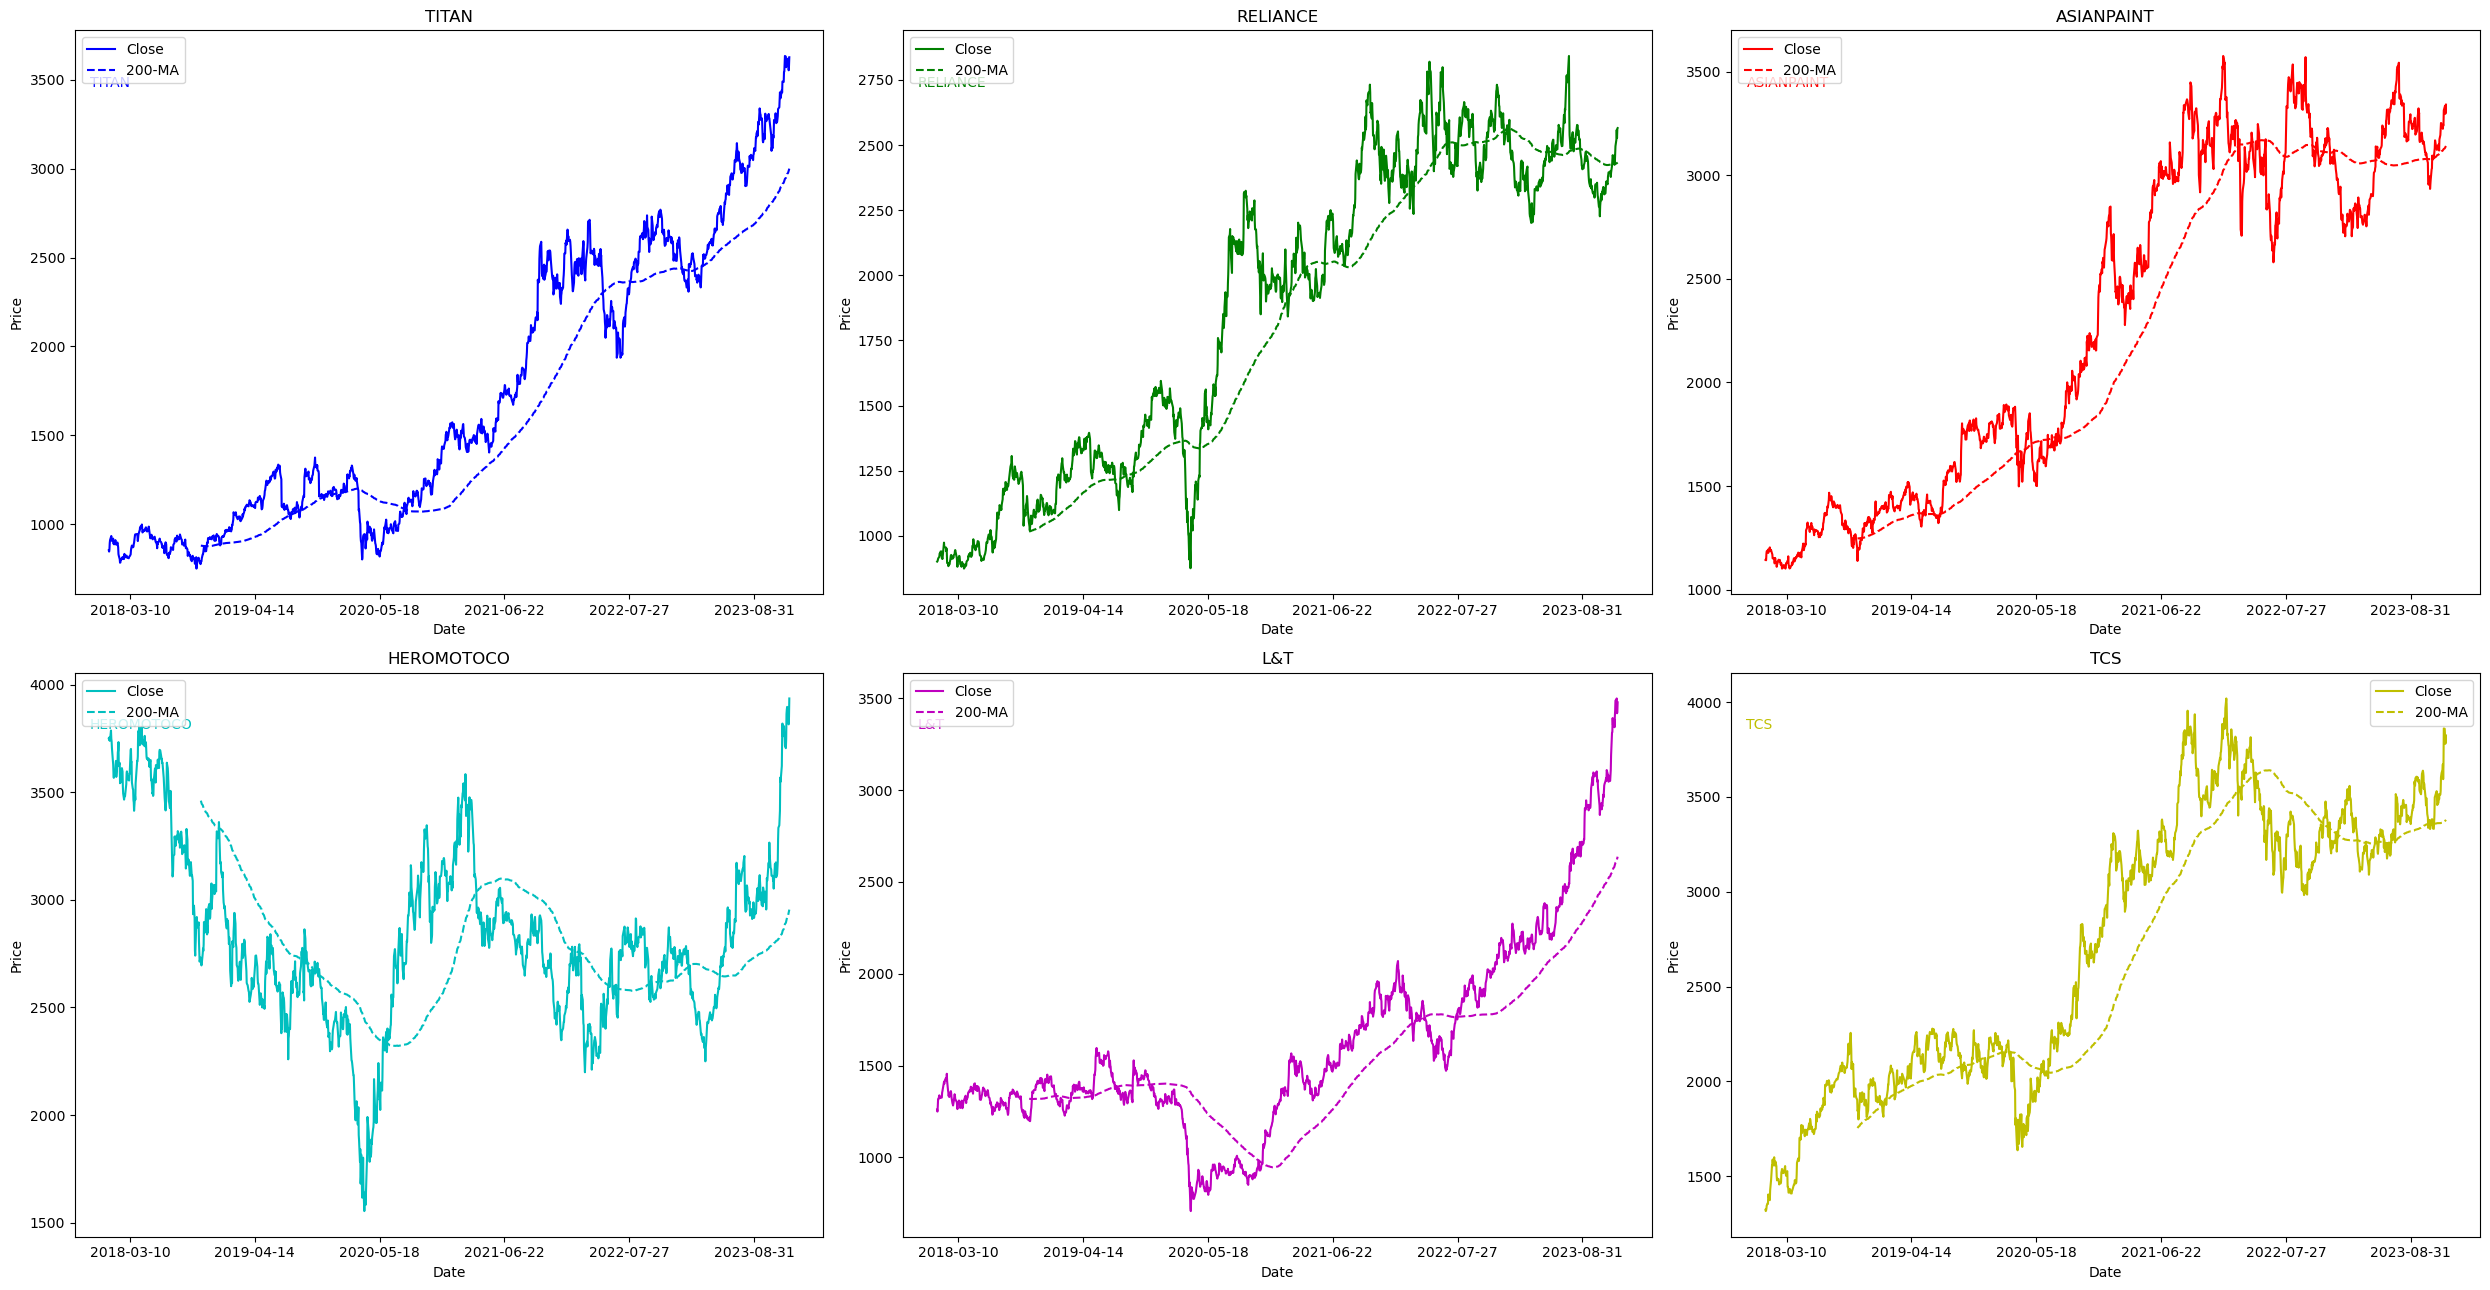

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import itertools

# List of file paths and corresponding symbols
file_symbol_mapping = {'TITAN.CSV': 'TITAN', 'RELIANCE.CSV': 'RELIANCE', 'ASIANPAINT.CSV': 'ASIANPAINT',
                        'HEROMOTOCO.CSV': 'HEROMOTOCO', 'L&T.csv': 'L&T', 'TCS.CSV': 'TCS'}

# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file and append its DataFrame to the list
for file_path, symbol in file_symbol_mapping.items():
    df = pd.read_csv(file_path)
    df['Symbol'] = symbol  # Add a new column for the symbol
    df['Date'] = pd.to_datetime(df['Date'])
    dfs.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
data = pd.concat(dfs, ignore_index=True)

# Calculate 200-day moving average for each stock
data['200_MA'] = data.groupby('Symbol')['Close'].transform(lambda x: x.rolling(window=200).mean())

# Plot a 3x3 grid layout with separate charts for each stock
symbols = data['Symbol'].unique()
colors = itertools.cycle(['b', 'g', 'r', 'c', 'm', 'y'])
fig, axs = plt.subplots(2, 3, figsize=(25, 13))

for i, symbol in enumerate(symbols):
    row, col = divmod(i, 3)
    symbol_data = data[data['Symbol'] == symbol]
    color = next(colors)
    
    axs[row, col].plot(symbol_data['Date'], symbol_data['Close'], label='Close', color=color)
    axs[row, col].plot(symbol_data['Date'], symbol_data['200_MA'], label='200-MA', linestyle='--', color=color)
    
    axs[row, col].set_title(f'{symbol}')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].xaxis.set_major_locator(MaxNLocator(nbins=6))  # Adjust x-axis ticks for better readability
    axs[row, col].legend()
    
    # Label the stock name on the chart
    axs[row, col].annotate(symbol, xy=(0.02, 0.9), xycoords='axes fraction', fontsize=10, color=color)

# Adjust layout
plt.tight_layout()
plt.show()
